In [1]:
# Get a 880Hz's audio file
import audioflux as af
from audioflux.type import SpectralFilterBankScaleType

sample_path = af.utils.sample_path('880') ## path to sample & reading file
audio_arr, sr = af.read(sample_path) # read file

# Create FeatureExtractor object and extract spectrogram
fa_obj = af.FeatureExtractor(transforms=['bft', 'cwt', 'cqt'], samplate=sr, radix2_exp=12,
                             scale_type=SpectralFilterBankScaleType.OCTAVE)
spec_result = fa_obj.spectrogram(audio_arr, is_continue=True)

#Extract spectral/xxcc/deconv
spectral_result = fa_obj.spectral(spec_result, spectral='flux',
                                  spectral_kw={'is_positive': True})
xxcc_result = fa_obj.xxcc(spec_result, cc_num=13)
deconv_result = fa_obj.deconv(spec_result)
print(deconv_result)

<deconv: defaultdict(<class 'list'>, {'bft': [(array([[ 2.3405863e+01,  1.7464914e+01,  1.6238699e+01, ...,
         1.0948656e+00,  1.1791005e+00,  1.0622741e+00],
       [ 6.2136374e+00,  7.1061702e+00,  7.9521255e+00, ...,
         3.0118230e-01,  2.5520623e-01,  2.5886670e-01],
       [ 3.5263178e+00,  9.3197107e-01,  2.1712103e-01, ...,
         4.9927313e-02,  8.5918836e-02,  6.1444856e-02],
       ...,
       [-1.9459357e-02, -1.3983797e-01, -4.3346595e-02, ...,
         1.2899895e-03,  4.1815154e-03,  2.3395901e-03],
       [-5.3981371e-02, -5.0373025e-02,  1.7963506e-02, ...,
        -2.2044554e-03,  1.3638076e-03, -1.0477363e-03],
       [-7.1646951e-02, -1.5775627e-01, -3.3626288e-02, ...,
        -7.7158352e-03, -4.5913705e-03, -2.9014596e-03]], dtype=float32), array([[ 0.0096342 ,  0.03826853,  0.03930365, ...,  0.05343958,
         0.0199039 ,  0.00715261],
       [-0.07913978,  0.04353779, -0.02306005, ...,  0.00708866,
        -0.01560772, -0.00602759],
       [-0.10894

In [10]:
import librosa
import numpy as np

drake = 'drake.mp3'
onedance = 'one_dance.mp3'

def duration(filename):
    duration_sec = librosa.get_duration(filename=filename)
    return duration_sec * 1000


def analyze_danceability(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path)
    
    # Compute the tempo and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    
    # Compute the beat times from the beat frames
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    # Analyze beat intervals for regularity
    beat_intervals = np.diff(beat_times)
    beat_interval_std = np.std(beat_intervals)
    
    # Placeholder for a danceability score calculation
    # This is where you'd implement your heuristic/model
    # For demonstration, let's just use tempo normalized by a typical dance tempo range
    # This is a simplistic approach and not a recommendation
    danceability_score = np.clip(tempo / 120.0, 0.0, 1.0)  # Assuming 120 BPM as a standard dance tempo
    
    return tempo, beat_frames

# Example usage
danceability_score = analyze_danceability(onedance)
print(f"our danceablility Score for drake: {danceability_score}")
duration(drake)
print('one dance actual danceability should be 0.792')


blankspace = 'blankspace.mp3'
duration(blankspace)
blank_dance = analyze_danceability(blankspace)
print("Blank space should be 0.76, our calc gives:")
print(blank_dance)

our danceablility Score for drake: (135.99917763157896, array([  87,  105,  124,  143,  162,  181,  200,  218,  237,  255,  274,
        293,  311,  330,  348,  367,  385,  404,  423,  442,  460,  479,
        497,  517,  538,  559,  578,  597,  617,  638,  659,  678,  696,
        716,  737,  758,  777,  796,  815,  836,  858,  877,  895,  915,
        936,  957,  976,  994, 1014, 1035, 1056, 1075, 1094, 1113, 1134,
       1156, 1174, 1193, 1213, 1234, 1255, 1274, 1293, 1312, 1333, 1355,
       1373, 1392, 1411, 1432, 1454, 1473, 1491, 1511, 1532, 1553, 1572,
       1591, 1610, 1631, 1653, 1672, 1690, 1710, 1731, 1752, 1771, 1790,
       1809, 1830, 1851, 1870, 1889, 1908, 1929, 1951, 1970, 1988, 2008,
       2029, 2050, 2069, 2088, 2107, 2126, 2145, 2163, 2182, 2201, 2220,
       2239, 2257, 2276, 2294, 2312, 2331, 2349, 2368, 2386, 2406, 2427,
       2448, 2467, 2486, 2505, 2526, 2547, 2566, 2585, 2604, 2625, 2647,
       2665, 2684, 2703, 2724, 2746, 2765, 2783, 2803, 2824, 2845, 2

/var/folders/_d/bgc0ml897834kf4fkff32r300000gn/T/ipykernel_57856/3215243000.py:8: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration_sec = librosa.get_duration(filename=filename)


Blank space should be 0.76, our calc gives:
(95.703125, array([  14,   41,   67,   94,  123,  148,  175,  202,  229,  255,  282,
        309,  336,  362,  389,  416,  443,  470,  497,  524,  551,  578,
        605,  632,  659,  686,  712,  739,  766,  793,  820,  847,  874,
        901,  928,  955,  982, 1008, 1035, 1062, 1089, 1116, 1143, 1170,
       1198, 1224, 1251, 1278, 1305, 1332, 1358, 1385, 1413, 1439, 1466,
       1493, 1520, 1547, 1574, 1601, 1628, 1655, 1682, 1708, 1736, 1762,
       1789, 1816, 1843, 1870, 1897, 1924, 1951, 1978, 2006, 2032, 2059,
       2085, 2112, 2139, 2166, 2193, 2221, 2247, 2274, 2301, 2328, 2354,
       2382, 2409, 2436, 2462, 2489, 2516, 2543, 2570, 2597, 2624, 2650,
       2677, 2704, 2731, 2758, 2785, 2812, 2839, 2866, 2893, 2920, 2947,
       2975, 3001, 3028, 3055, 3082, 3108, 3136, 3162, 3189, 3216, 3243,
       3270, 3298, 3324, 3351, 3378, 3405, 3431, 3458, 3485, 3512, 3539,
       3566, 3593, 3619, 3646, 3673, 3700, 3727, 3754, 3781, 3808, 3

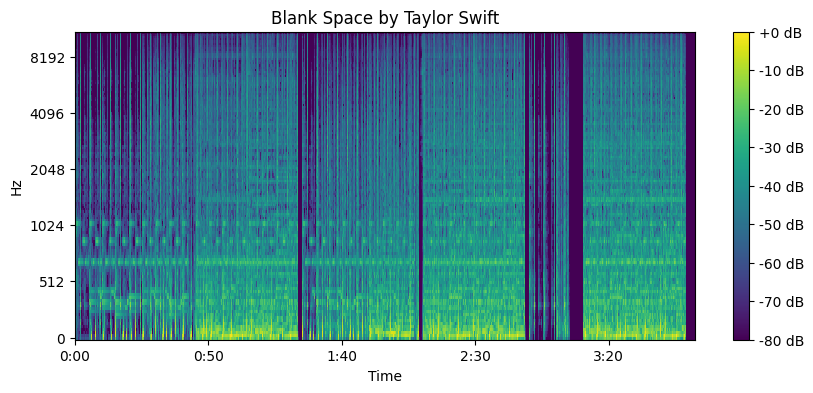

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load Audio File
# Replace 'drake' with the actual file path of the audio file you want to load
y, sr = librosa.load(blankspace)

# Extract Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to Decibels (Log Scale)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Blank Space by Taylor Swift')
plt.show()


